Come esercizio vorrei giocare sulla solita vecchia idea di alberto. In particolare considerazioni sulla regressione lineare e logistica.

Come primo passo generiamo dati da una regressione lineare:

In [979]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [981]:
num_features = 10
num_samples = 100

X_true = np.random.uniform(low=-1, high=1, size=(num_samples,num_features))
beta_true = np.random.uniform(low=-10,high=10,size= num_features)
error_output = np.random.randn(num_samples)
y_true = X_true.dot(beta_true) + error_output

Standard solution:

In [982]:
X_true.T.dot(y_true)

array([-380.81716082,  325.46871395, -359.18089665,  135.62961824,
       -195.9796946 , -333.84050995,   78.87232927, -192.60309131,
       -266.6845724 ,  -29.22503611])

In [983]:
(X_true.T.dot(X_true)).dot(beta_true)

array([-383.97576919,  322.30065548, -370.38516021,  138.42566134,
       -181.81980362, -331.62408591,   79.1777432 , -192.64903468,
       -266.97971731,  -33.43383079])

It is not exactly equal, but very close. The issue is in fact with the error term.

In [984]:
est_beta = np.linalg.inv(X_true.T.dot(X_true)).dot(X_true.T.dot(y_true))

In [985]:
est_beta

array([-9.52287189,  6.21846259, -5.90075299,  4.67397886, -3.8532676 ,
       -8.59388942, -3.45991087, -9.51669519, -9.75438734,  3.1005236 ])

In [986]:
beta_true

array([-9.59466621,  6.1181167 , -6.26936195,  4.84999154, -3.36333928,
       -8.41537117, -3.41206711, -9.5361569 , -9.75453851,  3.02316673])

In [987]:
def ext_direct(x, mat=X_true):
    return mat.dot(x)

def ext_reverse(x, mat=X_true):
    return mat.T.dot(x)

In [996]:
ext_reverse(y_true, mat=X_true)

array([-380.81716082,  325.46871395, -359.18089665,  135.62961824,
       -195.9796946 , -333.84050995,   78.87232927, -192.60309131,
       -266.6845724 ,  -29.22503611])

In [997]:
ext_reverse(ext_direct(beta_true, mat=X_true), mat=X_true)

array([-383.97576919,  322.30065548, -370.38516021,  138.42566134,
       -181.81980362, -331.62408591,   79.1777432 , -192.64903468,
       -266.97971731,  -33.43383079])

In [999]:
beta_start = np.random.uniform(low=-10,high=10,size= num_features)
beta = beta_start.copy()
beta

array([-0.3556315 ,  5.5475956 ,  5.99825521,  7.42778942, -7.99830739,
       -0.67992713, -1.6123885 ,  5.22952495,  4.72878703,  0.55194742])

In [1000]:
list_diff = []

for i in range(50):
    beta = beta + 0.01*ext_reverse(y_true-ext_direct(beta))
    mse = np.mean((y_true - ext_direct(beta))**2)
    list_diff.append(np.linalg.norm(mse))   

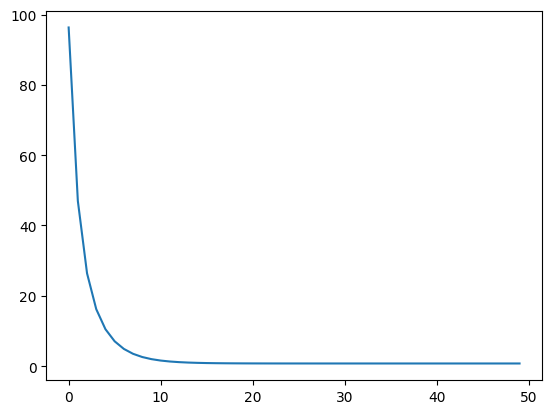

In [1001]:
plt.plot(list_diff)

In [1002]:
beta

array([-9.52269185,  6.21874248, -5.90103265,  4.67358943, -3.85334479,
       -8.59343666, -3.45920016, -9.5161948 , -9.75345399,  3.10033694])

In [1003]:
beta_true

array([-9.59466621,  6.1181167 , -6.26936195,  4.84999154, -3.36333928,
       -8.41537117, -3.41206711, -9.5361569 , -9.75453851,  3.02316673])

In [1004]:
est_beta

array([-9.52287189,  6.21846259, -5.90075299,  4.67397886, -3.8532676 ,
       -8.59388942, -3.45991087, -9.51669519, -9.75438734,  3.1005236 ])

Vediamo cosa succede con una regressione logistica, o filtrata da una relu.

In [1023]:
from scipy.special import expit, logit

X_true = np.random.uniform(low=-1, high=1, size=(num_samples,num_features))
beta_true = np.random.uniform(low=-10,high=10,size= num_features)
error_output = np.random.randn(num_samples)
y_true = expit(X_true.dot(beta_true) + 0.0* error_output)

In [1024]:
expit(X_true.T.dot(logit(y_true)))

array([3.92537408e-126, 3.19274119e-050, 4.35459753e-052, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 7.98360684e-004,
       1.60383223e-042, 1.00000000e+000])

In [1025]:
def ext_direct(x, mat=X_true):
    return expit(mat.dot(x))

def ext_reverse(x, mat=X_true):
    return mat.T.dot(x)

In [1044]:
beta_start = np.random.uniform(low=-10,high=10,size= num_features)
beta = beta_start.copy()
beta

array([ 2.73521293, -0.13276452,  4.21047431,  6.51219144,  6.42249804,
        6.75849689,  9.73368335,  1.68380183,  4.49910215,  8.4589604 ])

In [1045]:
list_diff = []

for i in range(5000):
    beta = beta + 0.01 * ext_reverse(y_true-ext_direct(beta))
    mse = np.mean((y_true - ext_direct(beta))**2)
    list_diff.append(np.linalg.norm(mse))   

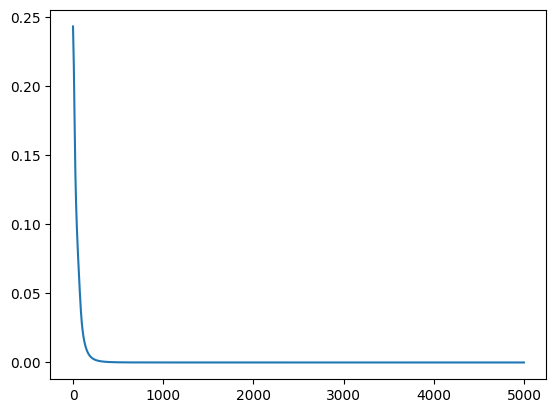

In [1046]:
plt.plot(list_diff)

In [1047]:
beta

array([-5.94822753, -1.95101022, -0.60539312,  0.64105963,  8.42596553,
        9.00611669,  2.22166096,  0.40230609, -1.5317904 ,  6.82098516])

In [1048]:
beta_true

array([-5.98235642, -1.96415769, -0.60994065,  0.64414061,  8.48614086,
        9.07343331,  2.24126586,  0.40981007, -1.5429695 ,  6.87256706])

In [1049]:
beta = beta_start

In [1050]:
beta = beta + 0.01*(ext_reverse(y_true)-ext_reverse(ext_direct(beta)))

## Neural network

In [1054]:
num_features = 10
num_samples = 100
num_hidden_units = 20

X_true = np.random.uniform(low=0, high=1, size=(num_samples,num_features))
W1_true = np.random.uniform(low=-10,high=10,size= (num_features,num_hidden_units))
W2_true = np.random.uniform(low=-10,high=10,size= (num_hidden_units,1))

error_output = np.random.randn(num_samples).reshape(num_samples,1)
error_output_hidd = np.random.randn(num_samples,num_hidden_units)
y_true = expit(expit(X_true.dot(W1_true)+error_output_hidd).dot(W2_true) + error_output) 

In [1055]:
def ext_direct(x, mat=X_true):
    return expit(mat.dot(x))

def ext_direct_combined(w1, w2, mat=X_true):
    return ext_direct(w2,ext_direct(w1,X_true))

In [ ]:
def ext_reverse(x, mat=X_true):
    return mat.T.dot(x)

def ext_reverse_combined(y, w2, mat=X_true):
    return (logit(y).dot(w2.T)).T.dot(mat)

In [973]:
def ext_reverse(x, mat=X_true):
    return mat.T.dot(logit(x))

def ext_reverse_combined(y, w2, mat=X_true):
    prova = w2.dot(logit(y.T*c))
    prova = prova/np.linalg.norm(prova,axis=0,keepdims=True)
    return ext_reverse(expit(prova).T,X_true)

In [974]:
def ext_reverse(x, mat=X_true):
    return mat.T.dot(logit(x))

def ext_reverse_combined(y, w2, mat=X_true):
    return (logit(y).dot(w2.T)).T.dot(mat)

In [1056]:
W1_start = np.random.uniform(low=-10,high=10,size= (num_features,num_hidden_units))
W2_start = np.random.uniform(low=-10,high=10,size= (num_hidden_units,1))
W1 = W1_start.copy()
W2 = W2_start.copy()

In [1057]:
list_diff = []
delta_1 = 0.001
delta_2 = 0.001

for i in tqdm(range(100)):
    
    X1 = ext_direct(W1, X_true)
    X2 = ext_direct(W2, X1)
    
    W2 = W2 + delta_2 * X1.T.dot(y_true-X2)
    W1 = W1 + delta_1 * X_true.T.dot((y_true-X2).dot(W2.T))

    mse = np.mean((y_true-X2)**2)
    list_diff.append(np.linalg.norm(mse))    

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 3949.77it/s]


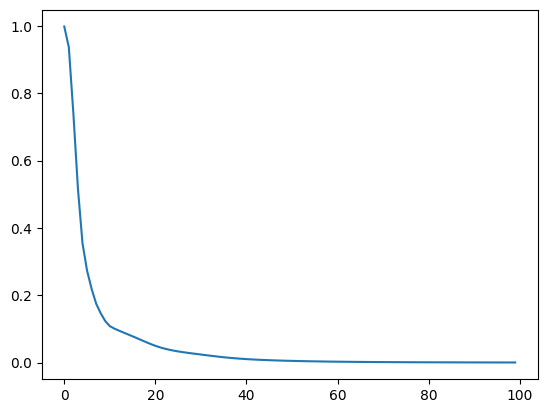

In [1060]:
plt.plot(list_diff)